In [2]:
import numpy as np # linear algebra and array operations
import pandas as pd # data processing and storage
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
from sklearn.cluster import KMeans # K-means clustering ML model
from sklearn.preprocessing import MinMaxScaler # data normalization and scaling

In [42]:
df = pd.read_csv('Mall_customers.csv') # read the dataset

### Exploratory Data Analysis

In [22]:
df.head() # display the first 5 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum() # check for missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe().round(2) # descriptive statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [7]:
df.duplicated().sum() # check for duplicates

0

In [39]:
df.tail() # display the last 5 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Initial impressions of the dataset
1. 200 rows and 4 columns
2. No null values
3. No duplicated values

### Preprocessing the Data

In [25]:
df['Gender'] = [ 1 if c == 'Male' else 0 for c in df['Gender']] # 'Encode' the values of Gender column, i.e. Male and Female, into 1 and 0 respectively

### Data Visualization

Text(0.5, 1.0, 'Correlation Matrix')

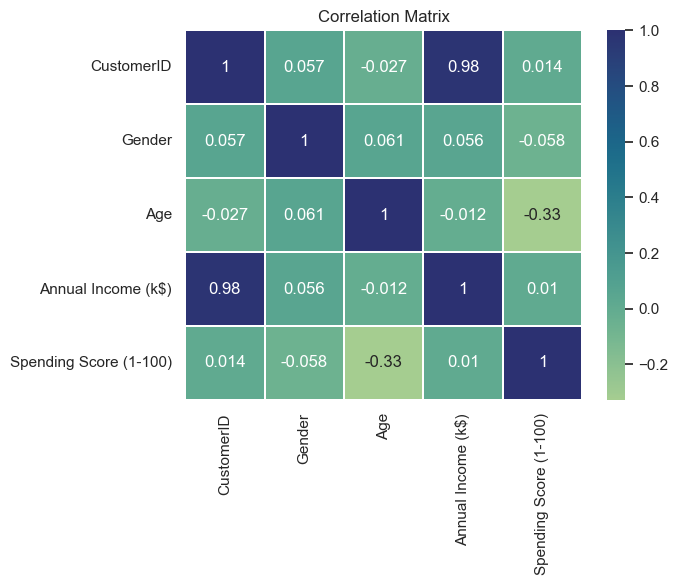

In [28]:
sns.heatmap(df.corr().round(3), annot=True, cmap='crest', linewidths=0.2) # plot the heatmap or correlation matrix to show the correlation between features
plt.title("Correlation Matrix")

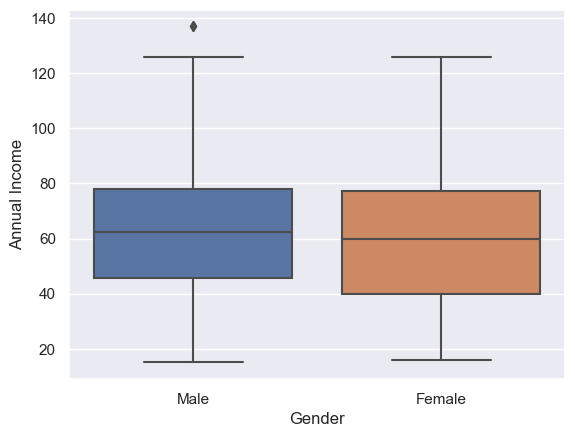

In [43]:
sns.set(style='darkgrid') # background color for the plot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df) # make the box plot with values of 'Gender' column on x-axis and values of 'Annual Income (k$)' columns on y-axis
plt.xlabel('Gender') # label for x-axis
plt.ylabel('Annual Income') # label for y-axis
plt.show() # plot the box plot

Looking at the graph, there is an outlier in the Male graph, so we would have to remove. I will find the value of the outlier through the following line of code:

In [31]:
max_x = df.loc[df['Annual Income (k$)'].idxmax()] # get the details of the row with maximum value of 'Annual Income (k$)' column

CustomerID                199
Gender                      1
Age                        32
Annual Income (k$)        137
Spending Score (1-100)     18
Name: 198, dtype: int64

As we can see, the outlier's value is 137, so we remove all instances of the value from the dataframe

In [40]:
df.drop(df.loc[df['Annual Income (k$)'] == 137].index, inplace=True) # drop all the rows where annual income is 137

<Axes: xlabel='Gender'>

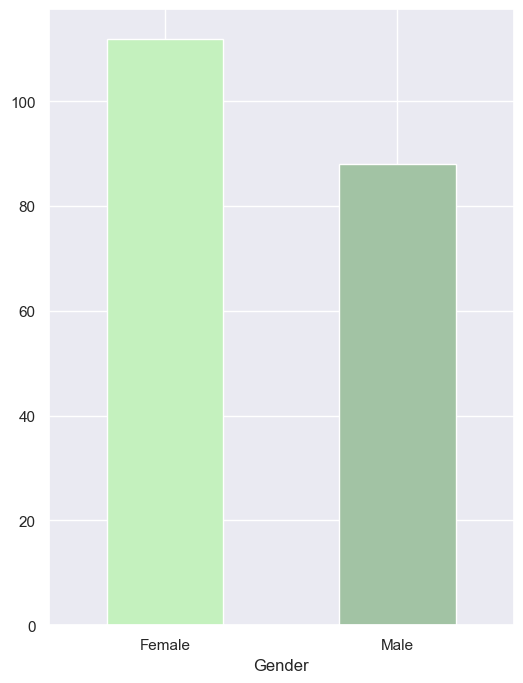

In [45]:
color = ['#C4F1BE', '#A2C3A4'] # color of the bar plots
df['Gender'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0) # make a bar plot using the counts of values in the Gender column

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

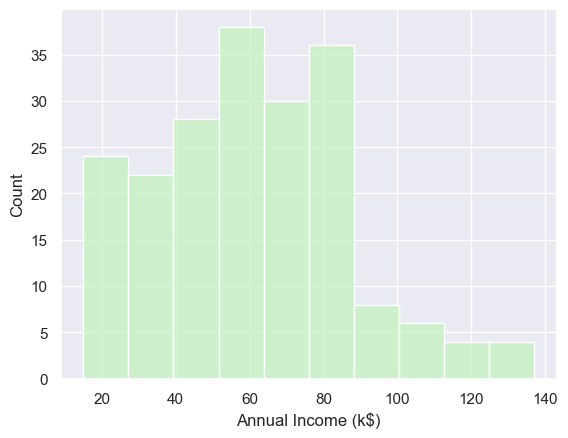

In [51]:
sns.histplot(df['Annual Income (k$)'], color='#C4F1BE') # plot the histogram for Annual Income (k$) column

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

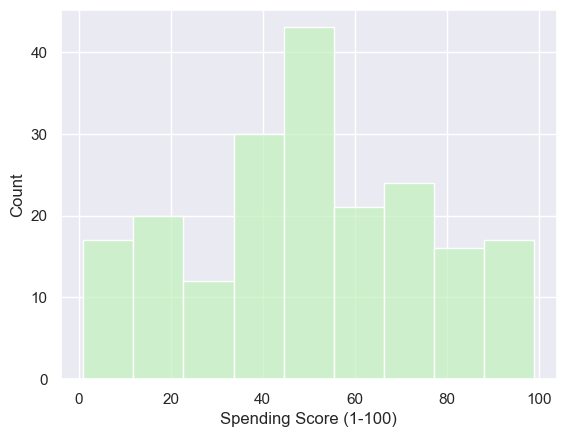

In [52]:
sns.histplot(df['Spending Score (1-100)'], color='#C4F1BE') # plot the histogram for Spending Score (1-100) column

Text(0, 0.5, 'Spending Score (1-100)')

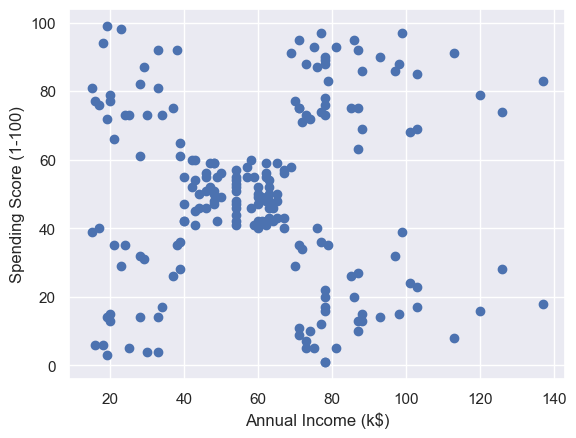

In [54]:
sns.set_theme() # set the theme for the plot (default is darkgrid)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)']) # make the scatter plot with values of 'Annual Income (k$)' column on x-axis and values of 'Spending Score (1-100)' column on y-axis
plt.xlabel('Annual Income (k$)') # label for x-axis
plt.ylabel('Spending Score (1-100)') # label for y-axis

### Scaling the Data and Prepping the Data for training

In [10]:
scaler = MinMaxScaler() # Creating an instance of MinMaxScaler class
scaler.fit(df[['Annual Income (k$)']]) # fit the data in column Annual Income (k$) to the scaler object
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']]) # transform the data and store it in the same column

# do the same for Spending Score column
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [12]:
df.drop(['CustomerID', 'Gender', 'Age'], axis=1, inplace=True) # dropping unnecessary columns

### Selecting suitable number of Clusters

I will be using the KMeans Clustering to divide the people into different groups. I will be using a technique called "Elbow technique" to find the suitable number of clusters. In elbow technique, we calculate the Sum of Squares error of different number of clusters within an arbitrary range and plot a graph. We check the 'elbow point' where the values of the graph starts to become parallel to the x-axis and use the corresponding number of clusters to train the model.

In [13]:
# Selecting the arbitrary range of 1 - 10 clusters
k_range = range(1, 11) # range of k values
sse = [] # empty list for storing the sum of squared errors for each k value

for k in k_range:
    km = KMeans(n_clusters=k) # KMeans algorithm
    km.fit(df) # Compute k-means clustering
    sse.append(km.inertia_) # Store the sum of squares error in the array

c:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

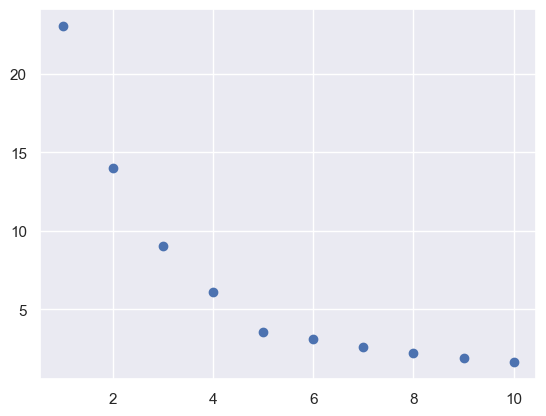

In [14]:
sns.set_theme() # set the theme for the plot (default is darkgrid)
plt.scatter(k_range, sse) # plot the scatter plot

As we can see in the graph, the 'elbow point' of the graph suggests we have to select 5 clusters

### Training the Model

In [15]:
km = KMeans(n_clusters=5) # selecting 5 clusters to divide the points in
y_predicted = km.fit_predict(df) # fit the model and predict the cluster for each data point

c:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
df['cluster'] = y_predicted # add the cluster column to the dataframe

In [17]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,4
2,0.008197,0.051020,2
3,0.008197,0.775510,4
4,0.016393,0.397959,2


Text(0, 0.5, 'Spending Score (1-100)')

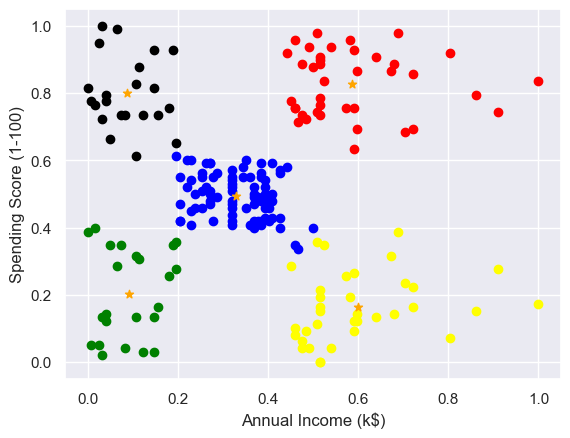

In [18]:
# dividing the rows with respect to each cluster and storing them in different dataframes
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

# plotting the clusters with respect to the 'Annual Income (k$)' and 'Spending Score (1-100)' columns along with their centroids
sns.set_theme()
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='blue')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='green')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='yellow')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='orange', marker='*', label='centroid')

# labeling the axes
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')